In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

centers = np.array([[-5,7],
                  [0,0],
                  [10,10]])
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=0)

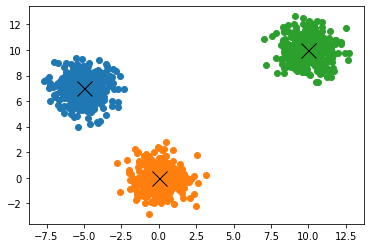

In [2]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

Algorithm
![](kmeans.png)

In [3]:
K = 3

m = np.random.rand(K,X.shape[1]) * 4
m

array([[3.39888248, 1.32872388],
       [0.90814501, 3.09444222],
       [1.04638774, 2.15824751]])

In [4]:
X.shape, m.shape

((1000, 2), (3, 2))

In [5]:
XE = X.reshape(-1, *X.shape)
XE.shape

(1, 1000, 2)

In [6]:
me = m.reshape( m.shape[0], -1, m.shape[1])
me.shape

(3, 1, 2)

In [7]:
D = XE - me
D.shape

(3, 1000, 2)

In [8]:
D2 = np.sum(D**2, axis = -1)
D2.shape

(3, 1000)

In [9]:
b = np.argmin(D2, axis = 0)
b[:20]

array([1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0])

In [10]:
for i in range(K):
    m[i] = X[b==i].mean(axis = 0)

In [11]:
m

array([[ 9.47293795,  9.29683258],
       [-4.68731497,  7.08653446],
       [-0.07200437, -0.01120305]])

# High dimensional substraction

In [12]:
A = np.array([[-10,10],
              [0,0],
              [0,0],
              [10,10]])

B = np.array([[1,1],
              [2,2],
              [3,3]])

In [13]:
A

array([[-10,  10],
       [  0,   0],
       [  0,   0],
       [ 10,  10]])

In [14]:
B

array([[1, 1],
       [2, 2],
       [3, 3]])

In [15]:
AE = A.reshape(-1, *A.shape)
AE, AE.shape

(array([[[-10,  10],
         [  0,   0],
         [  0,   0],
         [ 10,  10]]]),
 (1, 4, 2))

In [16]:
BE = B.reshape(B.shape[0], -1, B.shape[1])
BE,BE.shape

(array([[[1, 1]],
 
        [[2, 2]],
 
        [[3, 3]]]),
 (3, 1, 2))

In [17]:
AE - BE

array([[[-11,   9],
        [ -1,  -1],
        [ -1,  -1],
        [  9,   9]],

       [[-12,   8],
        [ -2,  -2],
        [ -2,  -2],
        [  8,   8]],

       [[-13,   7],
        [ -3,  -3],
        [ -3,  -3],
        [  7,   7]]])

# Kmeans

In [25]:
def kmeans(X, K = 3):
    m = np.random.rand(K,X.shape[1])* 10
    XE = X.reshape(-1, *X.shape)

    means = []
    means.append(m)
    for i in range(100):
        me = m.reshape( m.shape[0], -1, m.shape[1])
        D = XE - me
        D2 = np.sum(D**2, axis = -1)
        b = np.argmin(D2, axis = 0)

        m = np.array([X[b==i].mean(axis = 0) for i in range(K)])
        means.append(m)
    return means

In [26]:
def draw(X, means, ix = 0):
    print(means[ix])
    for i in range(3):
        plt.plot(X[y==i,0], X[y==i,1], 'o')
    for i in range(3):
        plt.plot(means[ix][i,0], means[ix][i,1], 'kx', markersize = 15)

In [27]:
means = kmeans(X, K = 3)

[[8.69775901 8.73043815]
 [2.23893452 7.51628998]
 [1.29446187 3.51652631]]


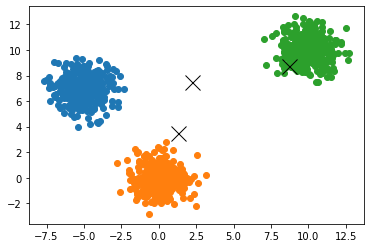

In [28]:
draw(X, means, ix = 0)

[[ 9.9574262  10.04942179]
 [-4.77403038  7.82389174]
 [-1.90408971  2.28694597]]


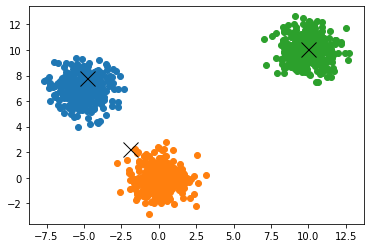

In [29]:
draw(X, means, ix = 1)

[[ 9.95742620e+00  1.00494218e+01]
 [-5.10565211e+00  7.01170963e+00]
 [-8.57084889e-03  3.48038418e-02]]


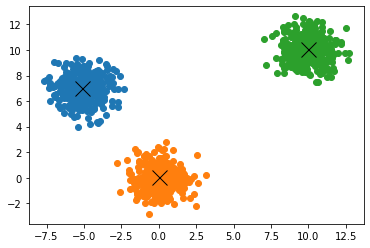

In [30]:
draw(X, means, ix = 2)

[[ 9.9574262  10.04942179]
 [-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]]


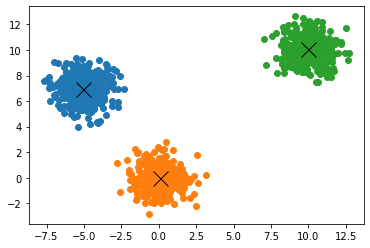

In [31]:
draw(X, means, ix = 3)

[[-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]
 [ 9.9574262  10.04942179]]


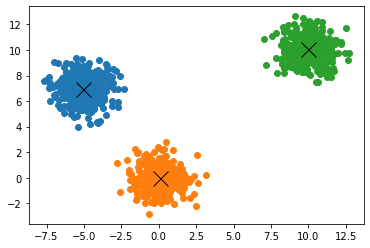

In [36]:
draw(X, means, ix = 99)

# GMM

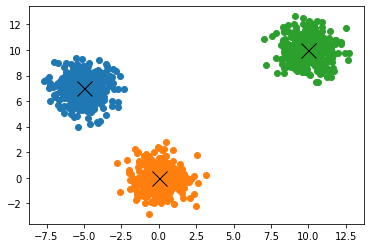

In [37]:
for i in range(3):
    plt.plot(X[y==i,0], X[y==i,1], 'o')
for i in range(3):
    plt.plot(centers[i,0], centers[i,1], 'kx', markersize = 15)

In [38]:
m = np.random.rand(K,X.shape[1])* 10
XE = X.reshape(-1, *X.shape)

means = []
means.append(m)
for i in range(100):
    me = m.reshape( m.shape[0], -1, m.shape[1])
    D = XE - me
    D2 = np.sum(D**2, axis = -1)
    b = np.argmin(D2, axis = 0)

    m = np.array([X[b==i].mean(axis = 0) for i in range(K)])
    means.append(m)

[[ 9.9574262  10.04942179]
 [-5.09062548  6.96406454]
 [ 0.0681967  -0.04311801]]


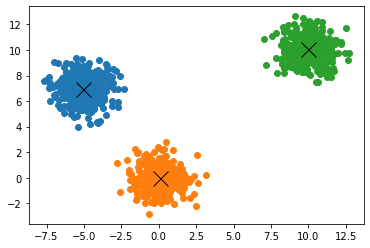

In [39]:
draw(X, means, ix = 90)